#### importing necessary model

In [158]:

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [159]:
data = pd.read_csv("D:\machine learning\Copper_Set.csv")

In [160]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [161]:
data.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [162]:
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [163]:
data.shape

(181673, 14)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


### Delling with the wrong fromat data

In [165]:


data["item_date"] = pd.to_datetime(data["item_date"], format='%Y%m%d',errors='coerce').dt.date
data["quantity tons"] = pd.to_numeric(data["quantity tons"] ,errors='coerce')
data["customer"] = pd.to_numeric(data["customer"], errors="coerce")
data["country"] = pd.to_numeric(data["country"] , errors="coerce")
data["application"] = pd.to_numeric(data["application"],errors="coerce")
data["thickness"] = pd.to_numeric(data["thickness"] ,errors="coerce")
data["width"] = pd.to_numeric(data["width"],errors="coerce")
data['material_ref'] = data['material_ref'].str.lstrip('0')
data["product_ref"] = pd.to_numeric(data["product_ref"],errors="coerce")
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce').dt.date
data["selling_price"] = pd.to_numeric(data["selling_price"] ,errors="coerce")

In [166]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


### Dealing with missing values

In [167]:
# here replacing the nan values in to Unknown 
data["material_ref"].replace(to_replace=np.nan, value="unknown", inplace=True)

# deleting the remaining null values as they are less than 1% of data which can be neglected
data = data.dropna()


In [168]:
data.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

#### visualizing outliers and skewness

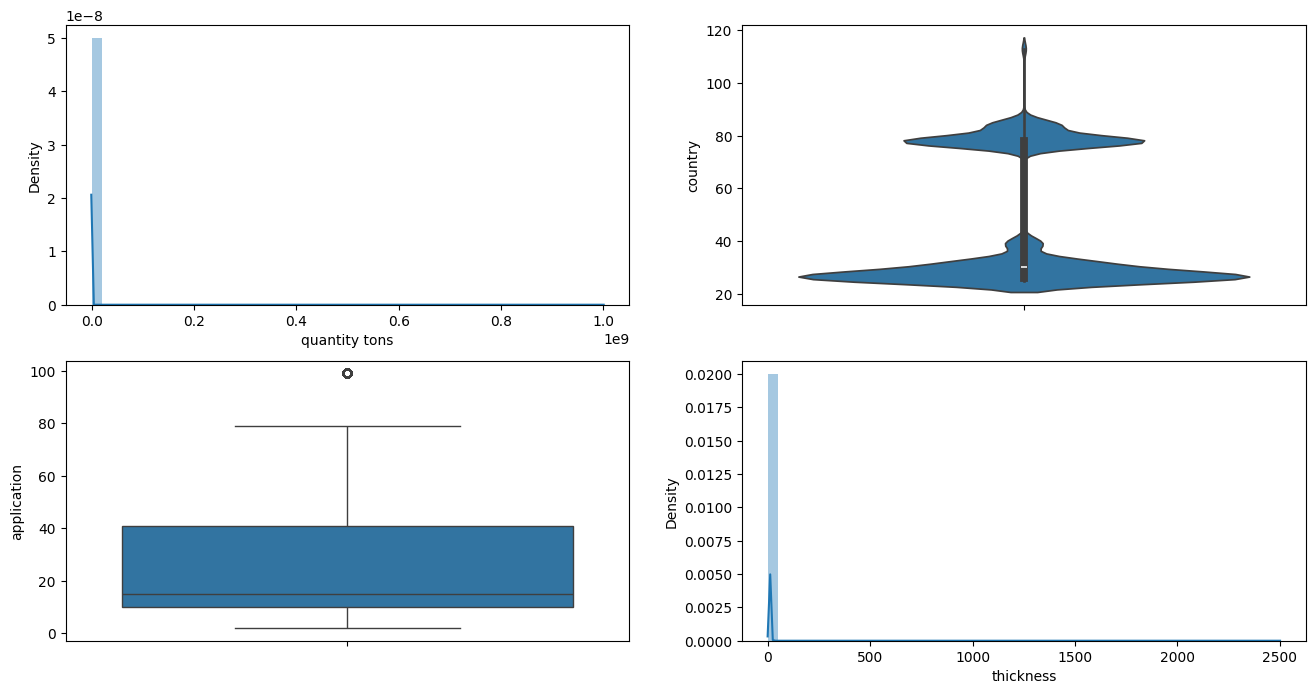

In [169]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['quantity tons'])
plt.subplot(2,2,2)
sns.violinplot(data['country'])
plt.subplot(2,2,3)
sns.boxplot(data["application"])
plt.subplot(2,2,4)
sns.distplot(data['thickness'])
plt.show()


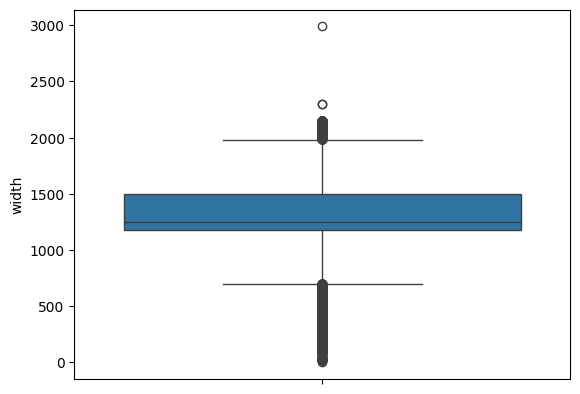

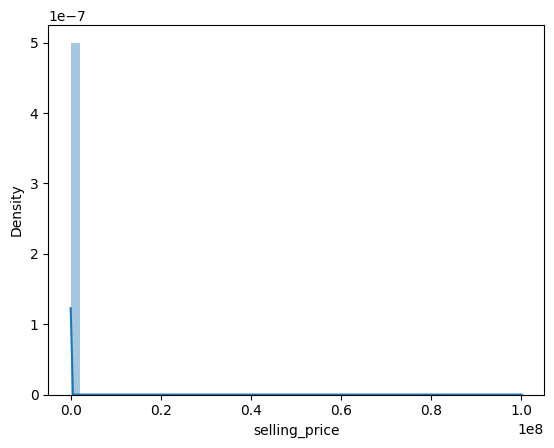

In [170]:
sns.boxplot(data["width"])
plt.show()

sns.distplot(data["selling_price"])
plt.show()


In [171]:
df_1 = data.copy()

In [172]:
import numpy as np
mask1 = df_1['selling_price'] <= 0
print(mask1.sum())
df_1.loc[mask1, 'selling_price'] = np.nan

mask1 = df_1['quantity tons'] <= 0
print(mask1.sum())
df_1.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_1['thickness'] <= 0
print(mask1.sum())

7
4
0


In [173]:
df_1.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [174]:
df_1.dropna(inplace=True)
len(df_1)

181620

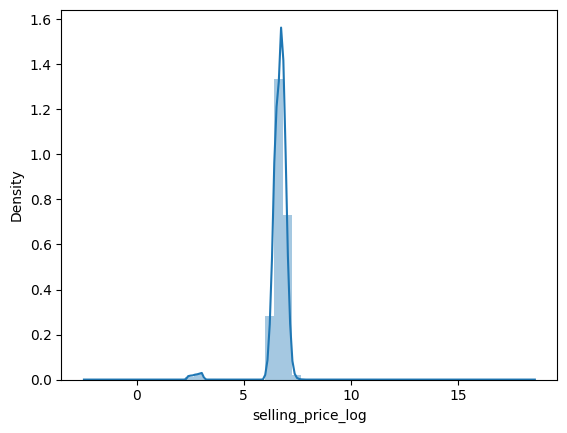

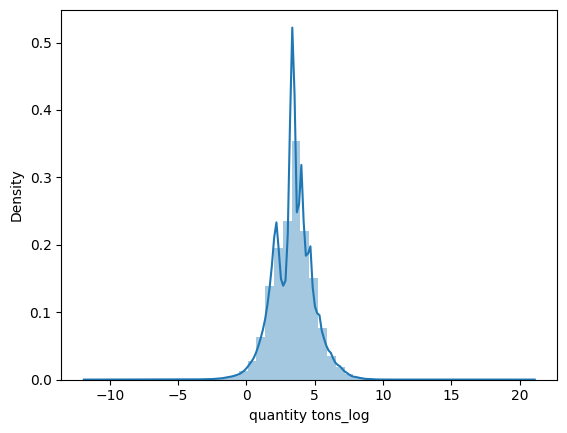

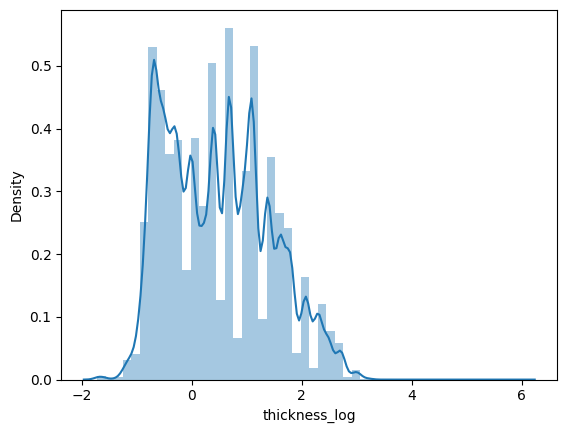

In [175]:
df_1["selling_price_log"] = np.log(df_1["selling_price"])
sns.distplot(df_1["selling_price_log"])
plt.show()

df_1["quantity tons_log"] = np.log(df_1["quantity tons"])
sns.distplot(df_1["quantity tons_log"])
plt.show()

df_1["thickness_log"] = np.log(df_1["thickness"])
sns.distplot(df_1["thickness_log"])
plt.show()

#### Correlation 

<Axes: >

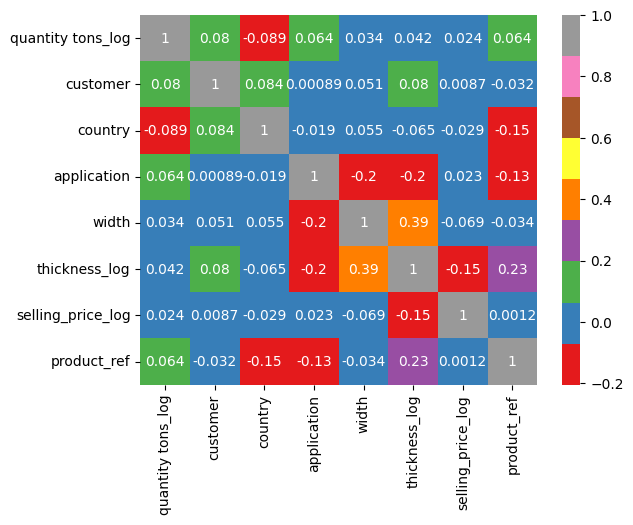

In [176]:
x = df_1[["quantity tons_log","customer","country","application","width","thickness_log","selling_price_log","product_ref"]].corr()
sns.heatmap(x, annot=True ,cmap='Set1')

In [177]:
pip install scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Regression algorithm

In [178]:
df_1.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0,6.953684,6.643822,-0.223144


In [179]:

import pandas
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


In [180]:
# Using Ordinal Encoder to covert categorical data into numerical data

OE = OrdinalEncoder()
df_1.status = OE.fit_transform(df_1[["status"]])

OER = OrdinalEncoder()
df_1["item type"] = OER.fit_transform(df_1[["item type"]])

In [181]:
df_1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,7.0,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,7.0,5.0,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,7.0,6.0,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,7.0,3.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,7.0,5.0,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294


In [182]:
df_1 =df_1.dropna()

### Regression

In [183]:
# split the data 

#split data into X, y
X=df_1[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_1['selling_price_log']

In [184]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit_transform(X)

array([[ 0.41506739,  0.70620108,  0.82144631, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [ 2.25042993,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [ 1.77453529,  0.70620108,  1.76911846, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [ 1.34669579,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-1.34846834,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [ 1.81043496,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [186]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.08464529095643192
0.07805457009696537


In [187]:
Rf_r = RandomForestRegressor(n_estimators = 20 , max_depth = 4 , random_state = 42)
Rf_r.fit(X_train,y_train)
print(Rf_r.score(X_train,y_train))
print(Rf_r.score(X_test,y_test))

0.8736436626286413
0.8867180545575358


In [188]:
grb = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state = 42)
grb.fit(X_train,y_train)
print(grb.score(X_train,y_train))
print(grb.score(X_test,y_test))

0.7627437653996635
0.7738696934709421


In [194]:
dft = DecisionTreeRegressor()

# hyperparameters 

param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# gridsearchcv

grid_search = GridSearchCV(estimator=dft , param_grid=param_grid, cv=5)
grid_search.fit(X_train,y_train)
print("Best Hyperparameters:",grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}


#### check metrics

In [190]:
#check MSE
metrics.mean_squared_error(y_test,y_pred)

np.float64(0.02800114671124916)

In [191]:
#check MAE
metrics.mean_absolute_error(y_test, y_pred)

np.float64(0.12695087045541245)

In [192]:
#R2 Score
print(metrics.r2_score(y_test,y_pred))

0.9135936536047295


In [206]:
import pickle

# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(SS, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(OER, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(OE, f)

#### classification

In [195]:
df_1.status.value_counts()

status
7.0    115996
1.0     34431
2.0     19566
5.0      4276
6.0      4167
0.0      3120
4.0        53
3.0        10
8.0         1
Name: count, dtype: int64

In [202]:
df = data.copy()

In [204]:
df = df[df["status"].isin(["Won","Lost"])]
print(len(df))

150435


In [205]:
df.status.value_counts()

status
Won     116004
Lost     34431
Name: count, dtype: int64

In [208]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [228]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.2/124.9 MB 1.5 MB/s eta 0:01:22
   ---------------------------------------- 0.7/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 1.2/124.9 MB 5.2 MB/s eta 0:00:24
   ---------------------------------------- 1.5/124.9 MB 5.8 MB/s eta 0:00:22
    --------------------------------------- 1.6/124.9 MB 5.4 MB/s eta 0:00:23
    --------------------------------------- 1.7/124.9 MB 4.9 MB/s eta 0:00:26
    ------------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [214]:
# #use ordinal encoder to convert categorical data into numerical data
OE_C = OrdinalEncoder()
df.status = OE_C.fit_transform(df[["status"]])
df["item type"] = OE_C.fit_transform(df[["item type"]])

In [215]:
X = df[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
Y = df["status"]

In [216]:
SS.fit_transform(X)

array([[-0.09139439,  0.09705592,  0.76978981, ..., -0.71017265,
        -0.72507203,  1.6673573 ],
       [ 1.52755772,  0.76054292,  0.76978981, ..., -0.83268141,
        -0.2835426 ,  1.66443363],
       [ 0.66147626, -0.62373848,  1.72295071, ..., -0.62850015,
        -0.74727633, -0.66115687],
       ...,
       [-0.20459491, -0.71081685,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [-4.74988274, -0.77269647,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [ 0.70809988, -0.75206993,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041]])

In [218]:
X_train , X_test , y_train , y_test = train_test_split(X, Y, test_size=0.3 , random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105304, 9)
(45131, 9)
(105304,)
(45131,)


In [220]:
dct = DecisionTreeClassifier(max_depth=5,random_state=1)
dct.fit(X_train,y_train)
print(dct.score(X_train,y_train))
print(dct.score(X_test,y_test))

0.8093139861733647
0.8112827103321442


In [221]:
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.9220352503228747
0.8905851853493164


In [224]:
Gbc = GradientBoostingClassifier(n_estimators=30 , learning_rate= 0.1 , random_state= 28)
Gbc.fit(X_train,y_train)
print(Gbc.score(X_train,y_train))
print(Gbc.score(X_test,y_test))

0.8192091468510218
0.8206554253174093


In [225]:
rfc = RandomForestClassifier(n_estimators= 20 ,max_depth= 4 ,random_state=35)
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

0.7937685178150877
0.7932020119208526


In [226]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7716895844412368
0.7698034610356518


In [229]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

0.616447136044171

In [230]:
y_predict = xgb_model.predict(X_test)

In [231]:
print(metrics.mean_squared_error(y_test,y_predict))

0.07563450737248835


In [232]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [233]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9309565487137444


In [234]:
knn.predict(X_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [235]:
Y_pred = knn.predict(X_test)

In [237]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
cm

array([[ 8209,  2180],
       [ 2758, 31984]])

Text(70.72222222222221, 0.5, 'Truth')

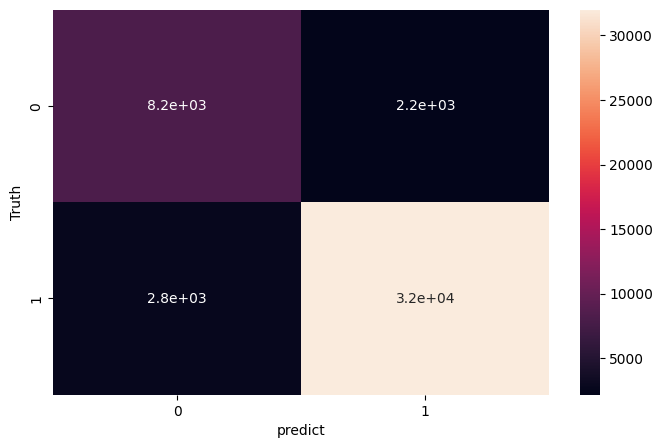

In [242]:
# heatmap

plt.figure(figsize=(8,5))
sns.heatmap(cm , annot=True)
plt.xlabel("predict")
plt.ylabel("Truth")

In [246]:
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report

In [249]:
accuracy_score(y_test,Y_pred)

0.8905851853493164

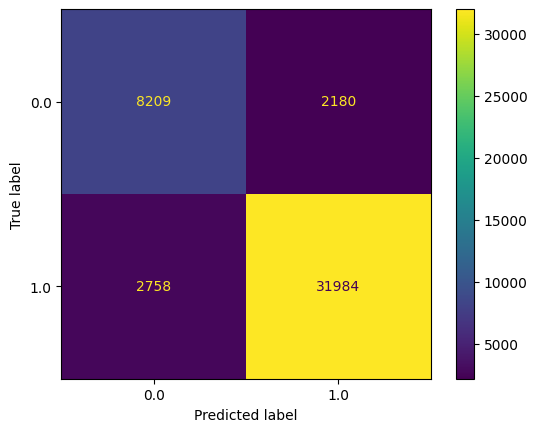

In [250]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()

In [251]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     10389
         1.0       0.94      0.92      0.93     34742

    accuracy                           0.89     45131
   macro avg       0.84      0.86      0.85     45131
weighted avg       0.89      0.89      0.89     45131



In [252]:
import pickle

# Saving the model
import pickle
with open('c_model.pkl', 'wb') as file:
    pickle.dump(knn, file)
with open('c_scaler.pkl', 'wb') as f:
    pickle.dump(SS, f)
with open('c_encode.pkl', 'wb') as f:
    pickle.dump(OE_C, f)
